In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

- ## 멘델의 모델

<br>

- ### 관측값의 TVD (total variation distance) 계산
    - #### 보라색 꽃이 필 확률: 75%
    - #### 흰색 꽃이 필 확률: 25%
    - #### 완두콩 929개를 재배하였을 때 705개에서 보라색 꽃이 핌

- ### 관측값의 TVD = 100 * (관측된 보라색 꽃의 수 / 재배한 완두콩 수) - 모델에서의 보라색 꽃 분포

In [2]:
observed_statistic = abs(100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

<br>

- ### 10000번 시뮬레이션 했을 때의 distance 분포

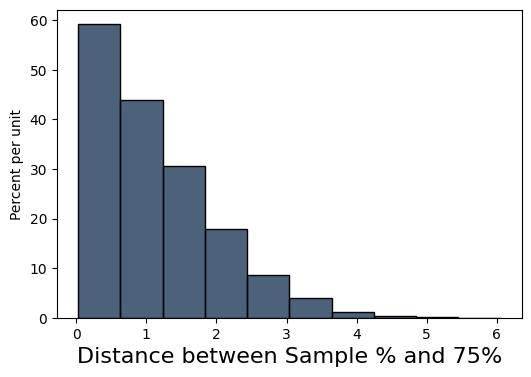

In [4]:
mendel_proportions = make_array(0.75, 0.25)
model_proportion_purple = 0.75

def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - model_proportion_purple)

distances = make_array()
for _ in range(10000):
    distances = np.append(distances, one_simulated_distance())
    
Table().with_column("Distance between Sample % and 75%", distances).hist()

- ### 관측값을 시뮬레이션 결과 히스토그램에 표시

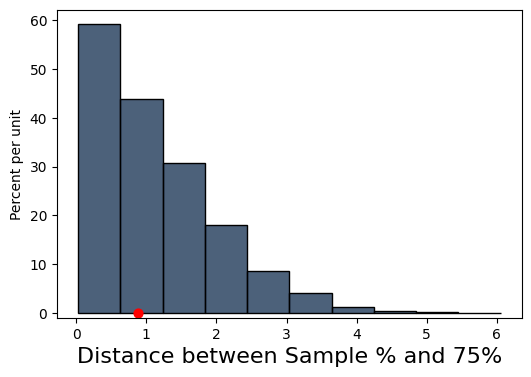

In [8]:
Table().with_column("Distance between Sample % and 75%", distances).hist()
plt.ylim(-0.01)
plt.scatter(observed_statistic, 0, color="red", s=40)

- <h3 style="font-weight:bold; color:red;">관측된 통계는 귀무가설에 의해 예측된 일반적 거리와 같으므로 멘델의 모델은 좋음</h3>

<br>

- ### 다른 누군가가 929개의 완두콩을 재배한 결과 관측된 거리가 3.2로 나왔을 경우

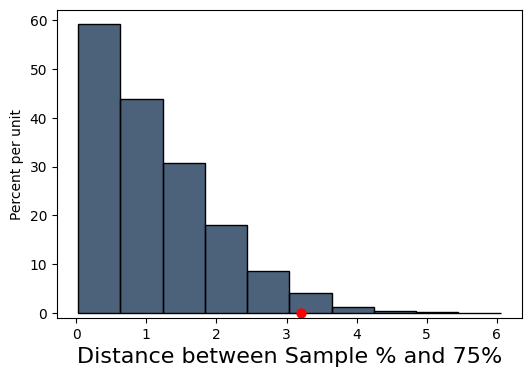

In [9]:
Table().with_column("Distance between Sample % and 75%", distances).hist()
plt.ylim(-0.01)
plt.scatter(3.2, 0, color="red", s=40)

<br>

- ### P-Value(유의 수준)
    - #### 주관적 판단을 사용하고 싶지 않은 경우 따를 수 있는 규칙
    - #### 작은 경우 대립가설을 더 많이 뒷받침함
    - <h4 style="font-weight:bold; color:red;">관측값의 거리보다 크거나 같은 거리의 백분율</h4>

- ### 거리가 3.2 이상일 때의 P-Value

In [11]:
np.count_nonzero(distances >= 3.2) / 10000

0.0258

- <h4 style="font-weight:bold; color:red;">P-Value가 작으므로 대립가설 채택, 모델이 새로운 식물에 적합하지 않음</h4>

---

- ## 동전 던지기는 공평한가?

<br>

- ### 10000번 시뮬레이션 했을 때의 distance 분포
    - #### 2000번 던졌을 때 앞면이 1000번 나올 것으로 예상

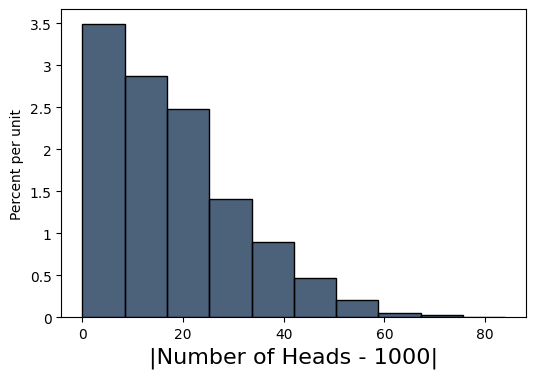

In [17]:
def one_simulated_value():
    coin = make_array("Heads", "Tails")
    return abs(np.count_nonzero(np.random.choice(coin, 2000) == "Heads") - 1000)

distances = make_array()
for _ in range(10000):
    distances = np.append(distances, one_simulated_value())
Table().with_column("|Number of Heads - 1000|", distances).hist()

<br>

- ## P-value의 cut off
    - <h4 style="font-weight:bold; color:red;">P-value의 cut-off 로 p%를 사용하면 귀무가설이 사실일 때, 대립가설을 채택할 확률이 p%가 됨</h4>

- ### P-value의 cut off로 5% 사용
    - #### 대략 45 이상일시 코인이 불공평하다고 결론

In [23]:
np.sort(distances)[-int(10000 * (5/100))]

44.0